In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score


In [39]:
# loading the data from csv file to a pandas Dataframe
dataset = pd.read_csv('heart_disease_data.csv')

In [40]:
# printing the first 5 rows of the dataset
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [41]:
# number of rows and Columns in this dataset
dataset.shape

(303, 14)

In [42]:
dataset['target'].value_counts()

,count
target,
1,165
0,138


In [43]:
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [44]:
# separating the data and labels
X = dataset.drop(columns = 'target', axis=1)
Y = dataset['target']

In [45]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [47]:
print(X_train.shape,X_test.shape)
print(Y_train.value_counts())
print(Y_test.value_counts())

(242, 13) (61, 13)
target
1    132
0    110
Name: count, dtype: int64
target
1    33
0    28
Name: count, dtype: int64


#Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(X_train, Y_train)


# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


accuracy_value= training_data_accuracy*100
precision_value = precision_score(Y_train, X_train_prediction)*100
recall_value = recall_score(Y_train, X_train_prediction)*100
f1_score_value = f1_score(Y_train, X_train_prediction)*100

accuracy_value1= test_data_accuracy*100
precision_value1 = precision_score(Y_test, X_test_prediction)*100
recall_value1 = recall_score(Y_test, X_test_prediction)*100
f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

print('Train Accuracy =',accuracy_value,'%')
print('Train Precision =',precision_value,'%')
print('Train Recall =',recall_value,'%')
print('Train F1 Score =',f1_score_value,'%')
print('....................................')
print('....................................')
print('Test Accuracy =',accuracy_value1,'%')
print('Test Precision =',precision_value1,'%')
print('Test Recall =',recall_value1,'%')
print('Test F1 Score =',f1_score_value1,'%')

Train Accuracy = 88.01652892561982 %
Train Precision = 89.31297709923665 %
Train Recall = 88.63636363636364 %
Train F1 Score = 88.97338403041825 %
....................................
....................................
Test Accuracy = 72.1311475409836 %
Test Precision = 78.57142857142857 %
Test Recall = 66.66666666666666 %
Test F1 Score = 72.1311475409836 %


Bargraph of Train Data


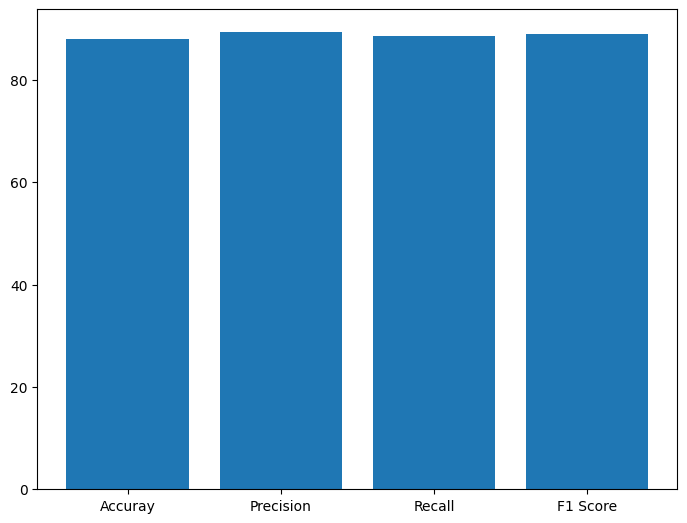

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [accuracy_value, precision_value, recall_value, f1_score_value]
ax.bar(Performance,data)
print("Bargraph of Train Data")
plt.show()

Bargraph of Testing Data


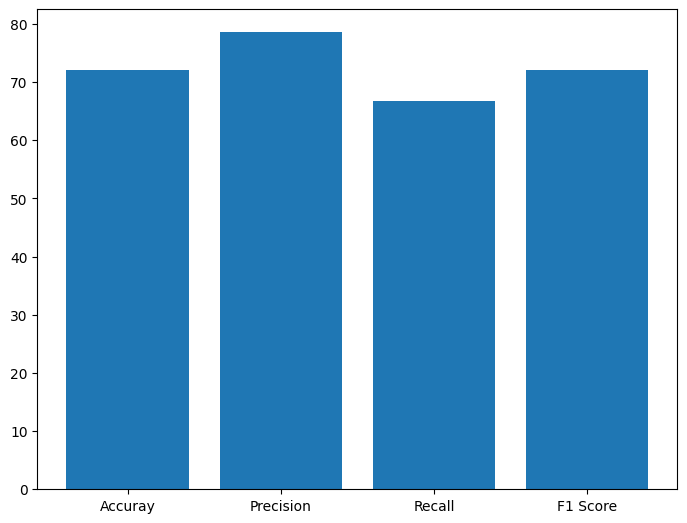

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [accuracy_value1, precision_value1, recall_value1, f1_score_value1]
ax.bar(Performance,data)
print("Bargraph of Testing Data")
plt.show()

#MLP

In [51]:
from sklearn.neural_network import MLPClassifier
classifier=MLPClassifier(alpha=0.00001, max_iter=100).fit(X_train, Y_train)


# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


accuracy_value= training_data_accuracy*100
precision_value = precision_score(Y_train, X_train_prediction)*100
recall_value = recall_score(Y_train, X_train_prediction)*100
f1_score_value = f1_score(Y_train, X_train_prediction)*100

accuracy_value1= test_data_accuracy*100
precision_value1 = precision_score(Y_test, X_test_prediction)*100
recall_value1 = recall_score(Y_test, X_test_prediction)*100
f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

print('Train Accuracy =',accuracy_value,'%')
print('Train Precision =',precision_value,'%')
print('Train Recall =',recall_value,'%')
print('Train F1 Score =',f1_score_value,'%')
print('....................................')
print('....................................')
print('Test Accuracy =',accuracy_value1,'%')
print('Test Precision =',precision_value1,'%')
print('Test Recall =',recall_value1,'%')
print('Test F1 Score =',f1_score_value1,'%')

Train Accuracy = 91.32231404958677 %
Train Precision = 89.36170212765957 %
Train Recall = 95.45454545454545 %
Train F1 Score = 92.3076923076923 %
....................................
....................................
Test Accuracy = 85.24590163934425 %
Test Precision = 85.29411764705883 %
Test Recall = 87.87878787878788 %
Test F1 Score = 86.56716417910447 %


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Bargraph of Train Data


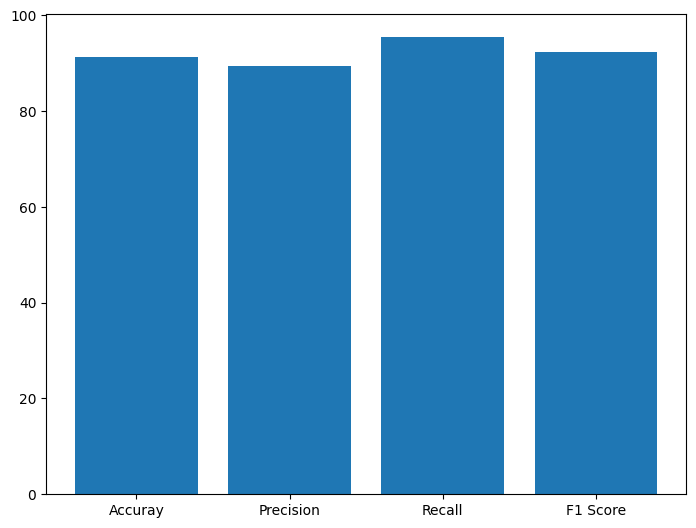

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [accuracy_value, precision_value, recall_value, f1_score_value]
ax.bar(Performance,data)
print("Bargraph of Train Data")
plt.show()

Bargraph of Testing Data


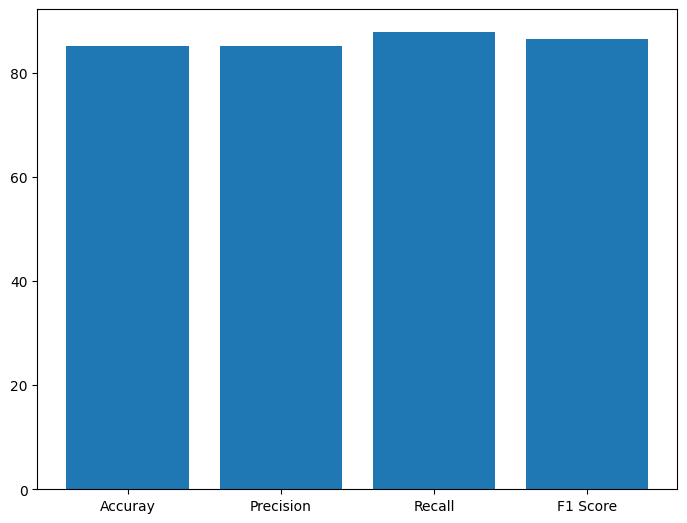

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [accuracy_value1, precision_value1, recall_value1, f1_score_value1]
ax.bar(Performance,data)
print("Bargraph of Testing Data")
plt.show()

#Random Forest

In [54]:
classifier=RandomForestClassifier(n_estimators=1000, random_state=2)
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


accuracy_value= training_data_accuracy*100
precision_value = precision_score(Y_train, X_train_prediction)*100
recall_value = recall_score(Y_train, X_train_prediction)*100
f1_score_value = f1_score(Y_train, X_train_prediction)*100

accuracy_value1= test_data_accuracy*100
precision_value1 = precision_score(Y_test, X_test_prediction)*100
recall_value1 = recall_score(Y_test, X_test_prediction)*100
f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

print('Train Accuracy =',accuracy_value,'%')
print('Train Precision =',precision_value,'%')
print('Train Recall =',recall_value,'%')
print('Train F1 Score =',f1_score_value,'%')
print('....................................')
print('....................................')
print('Test Accuracy =',accuracy_value1,'%')
print('Test Precision =',precision_value1,'%')
print('Test Recall =',recall_value1,'%')
print('Test F1 Score =',f1_score_value1,'%')

Train Accuracy = 100.0 %
Train Precision = 100.0 %
Train Recall = 100.0 %
Train F1 Score = 100.0 %
....................................
....................................
Test Accuracy = 85.24590163934425 %
Test Precision = 83.33333333333334 %
Test Recall = 90.9090909090909 %
Test F1 Score = 86.95652173913044 %


Bargraph of Train Data


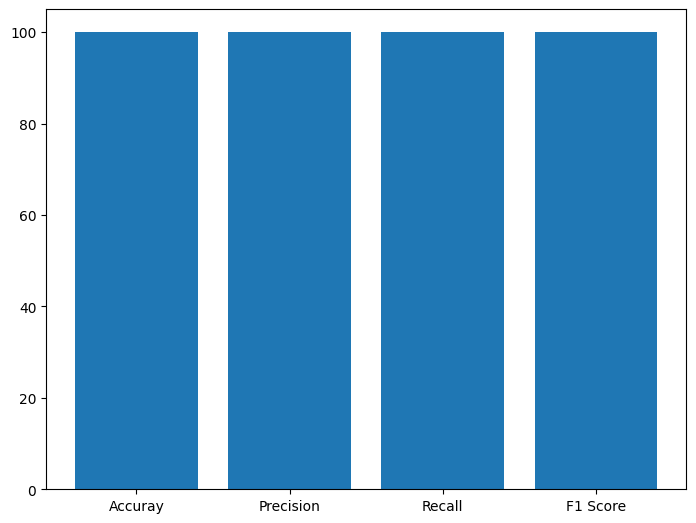

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [accuracy_value, precision_value, recall_value, f1_score_value]
ax.bar(Performance,data)
print("Bargraph of Train Data")
plt.show()

Bargraph of Test Data


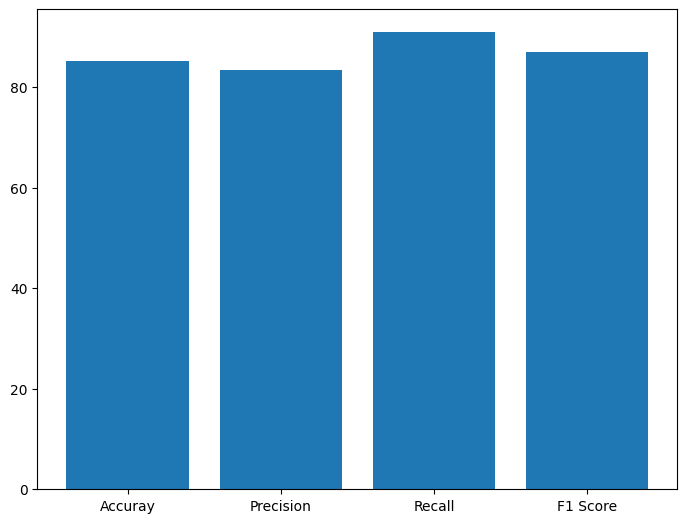

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [accuracy_value1, precision_value1, recall_value1, f1_score_value1]
ax.bar(Performance,data)
print("Bargraph of Test Data")
plt.show()

#Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=1, max_iter=300).fit(X_train, Y_train)


# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


accuracy_value= training_data_accuracy*100
precision_value = precision_score(Y_train, X_train_prediction)*100
recall_value = recall_score(Y_train, X_train_prediction)*100
f1_score_value = f1_score(Y_train, X_train_prediction)*100

accuracy_value1= test_data_accuracy*100
precision_value1 = precision_score(Y_test, X_test_prediction)*100
recall_value1 = recall_score(Y_test, X_test_prediction)*100
f1_score_value1 = f1_score(Y_test, X_test_prediction)*100

print('Train Accuracy =',accuracy_value,'%')
print('Train Precision =',precision_value,'%')
print('Train Recall =',recall_value,'%')
print('Train F1 Score =',f1_score_value,'%')
print('....................................')
print('....................................')
print('Test Accuracy =',accuracy_value1,'%')
print('Test Precision =',precision_value1,'%')
print('Test Recall =',recall_value1,'%')
print('Test F1 Score =',f1_score_value1,'%')

Train Accuracy = 85.12396694214877 %
Train Precision = 83.33333333333334 %
Train Recall = 90.9090909090909 %
Train F1 Score = 86.95652173913044 %
....................................
....................................
Test Accuracy = 85.24590163934425 %
Test Precision = 85.29411764705883 %
Test Recall = 87.87878787878788 %
Test F1 Score = 86.56716417910447 %


Bargraph of Train Data


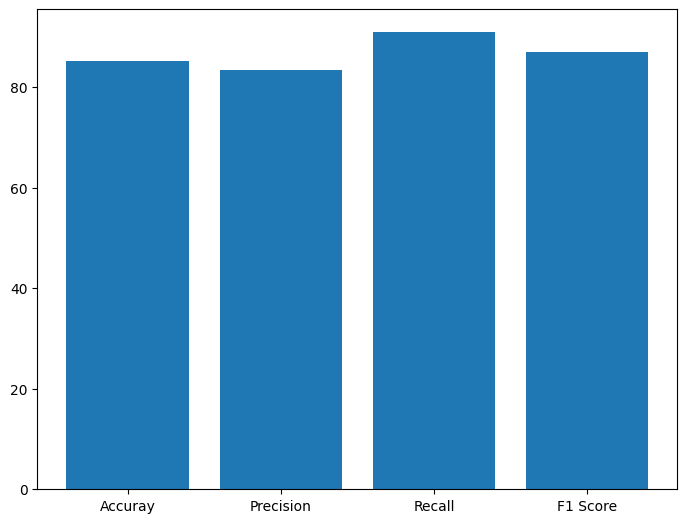

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [accuracy_value, precision_value, recall_value, f1_score_value]
ax.bar(Performance,data)
print("Bargraph of Train Data")
plt.show()

Bargraph of Train Data


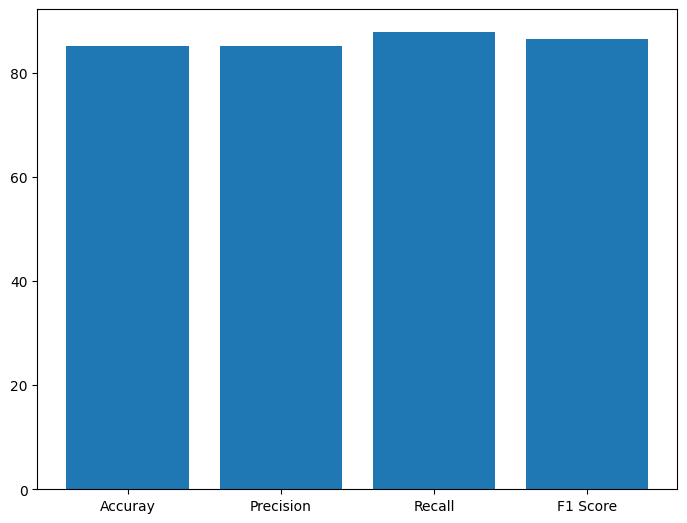

In [60]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Performance = ['Accuray', 'Precision', 'Recall', 'F1 Score']
data = [accuracy_value1, precision_value1, recall_value1, f1_score_value1]
ax.bar(Performance,data)
print("Bargraph of Train Data")
plt.show()